In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# importando base de dados
a1_data = pd.read_csv("aula/aula21.csv", delimiter=',')
a1_data

,a,b,c,d,e,f
0,85,379,614,190,854,92
1,116,175,514,665,2,111
2,155,802,887,545,392,77
3,124,395,323,734,956,146
4,100,415,35,139,337,91
...,...,...,...,...,...,...
601,297,665,239,909,427,775
602,293,557,663,668,382,738
603,292,597,630,299,659,776
604,313,440,108,980,161,728


In [4]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(a1_data)

In [6]:
centros = kmeans.cluster_centers_
centros

array([[677.00729927, 571.79927007, 636.22627737, 536.54379562,
        598.83941606, 731.34671533],
       [369.84036145, 462.90060241, 424.75      , 460.89759036,
        395.52108434, 496.75      ]])

In [22]:
cluster_0 = centros[0]
cluster_1 = centros[1]

In [23]:
diferenca = np.abs(cluster_0 - cluster_1)
diferenca

array([307.16693782, 108.89866766, 211.47627737,  75.64620526,
       203.31833172, 234.59671533])

In [25]:
atributos = [f'Atributo {i+1}' for i in range(len(diferenca))]
df_diferenca = pd.DataFrame({'Atributo': atributos, 'Diferença': diferenca})
df_diferenca = df_diferenca.sort_values(by='Diferença', ascending=False)

print(df_diferenca)

     Atributo   Diferença
0  Atributo 1  307.166938
5  Atributo 6  234.596715
2  Atributo 3  211.476277
4  Atributo 5  203.318332
1  Atributo 2  108.898668
3  Atributo 4   75.646205


In [39]:
df = a1_data["a"] + a1_data["f"]
df['Cores'] = np.random.rand(len(df))

Os atributos com maior diferença são A e F, como é possível ver pelos valores obtidos acima.

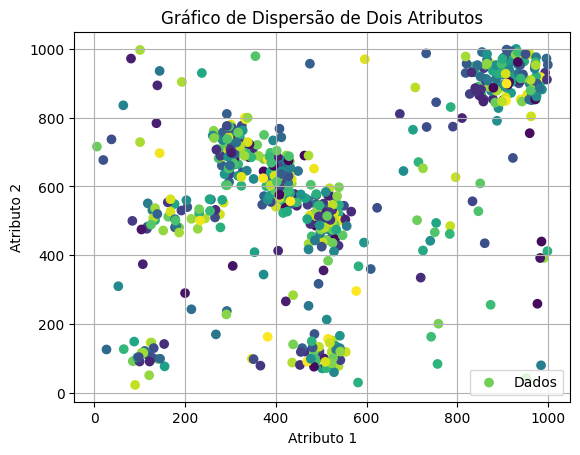

In [40]:
plt.scatter(a1_data["a"], a1_data["f"], c=df['Cores'], label='Dados')
plt.title('Gráfico de Dispersão de Dois Atributos')
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
kmeans = KMeans(n_clusters=7, random_state=0, n_init="auto").fit(a1_data)

In [42]:
centros = kmeans.cluster_centers_
centros

array([[906.625     , 517.6875    , 550.8203125 , 467.5234375 ,
        460.8359375 , 908.9296875 ],
       [372.61538462, 212.67692308, 254.26153846, 264.78461538,
        503.07692308, 543.6       ],
       [448.01234568, 494.41975309, 727.13580247, 257.51851852,
        746.58024691, 497.08641975],
       [428.49425287, 204.6091954 , 719.48275862, 667.35632184,
        354.04597701, 504.02298851],
       [392.68181818, 601.93181818, 186.67045455, 736.46590909,
        543.78409091, 528.57954545],
       [392.07142857, 753.77380952, 402.9047619 , 296.63095238,
        213.53571429, 523.76190476],
       [369.32876712, 768.93150685, 774.61643836, 744.2739726 ,
        638.94520548, 534.35616438]])

In [43]:
feature_pairs = [("a", "b"), ("a", "c"), ("a", "d"), ("a",
"e"), ("a", "f"),
 ("b", "c"), ("b", "d"), ("b", "e"), ("b",
"f"),
 ("c", "d"), ("c", "e"), ("c", "f"),
 ("d", "e"), ("d", "f"),
 ("e", "f")]

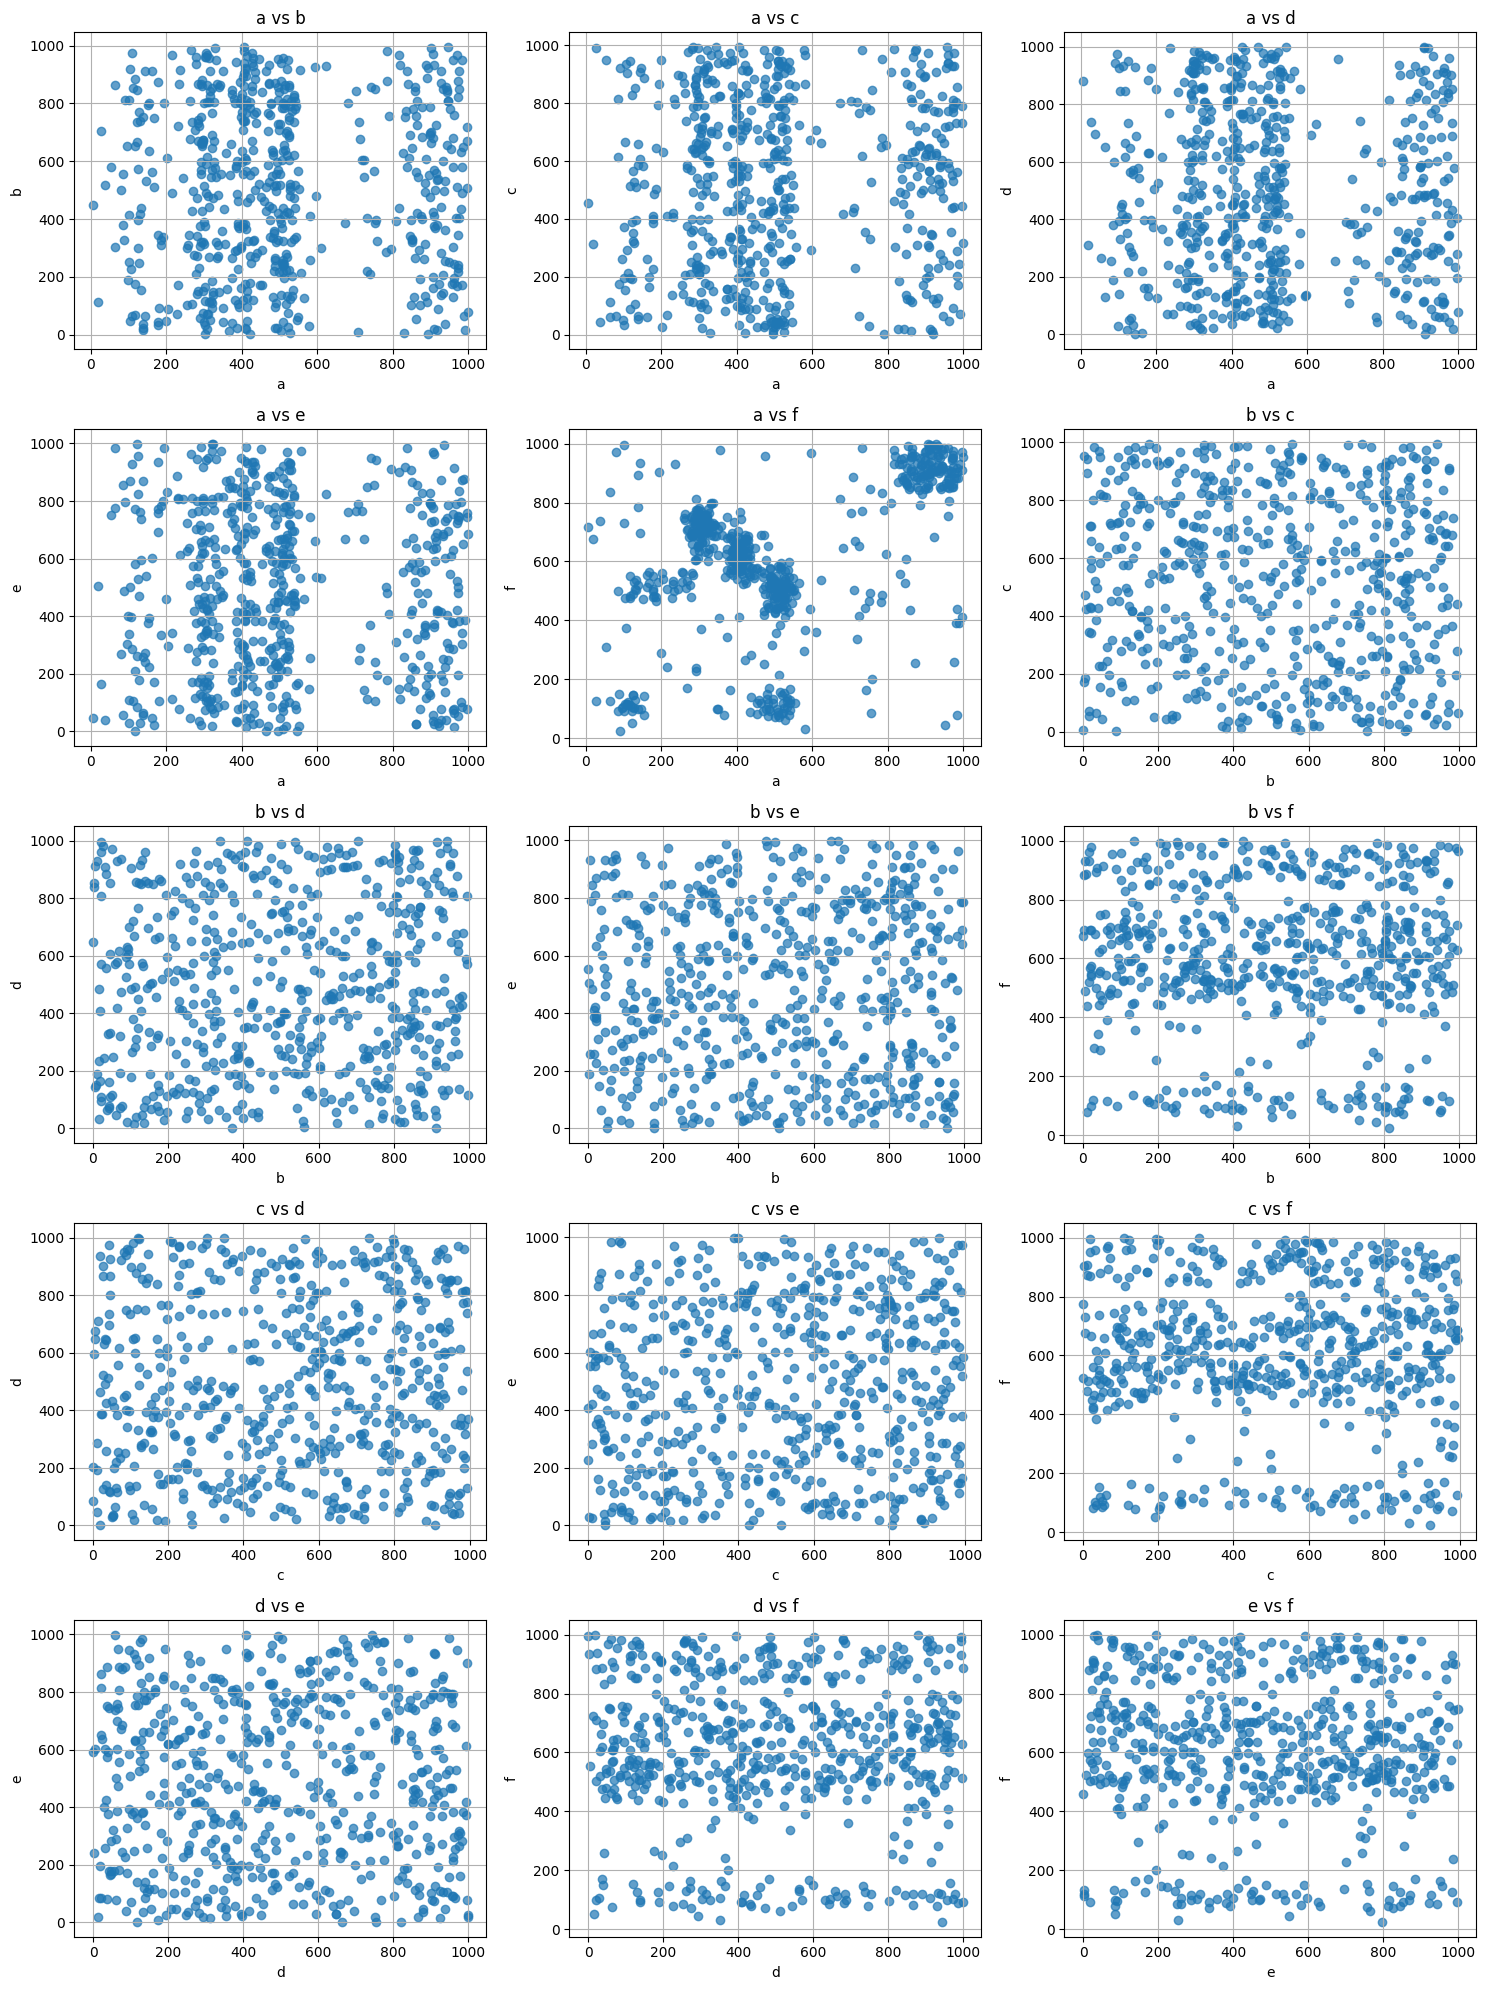

In [44]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, (attr1, attr2) in enumerate(feature_pairs):
    ax = axes[i]
    ax.scatter(a1_data[attr1], a1_data[attr2], alpha=0.7)
    ax.set_xlabel(attr1)
    ax.set_ylabel(attr2)
    ax.set_title(f'{attr1} vs {attr2}')
    ax.grid(True)

# Ajustar layout
plt.tight_layout()
plt.show()

O gráfico que apresenta uma diferença maior de resultados é o de a e f. Neste gráfico notamos que os dados parecem mais centrados em "núcleos". Alguns gráficos possuem os dados distribuídos de forma mais uniforme enquanto outros possuem dados esparsos no sentido horizontal ou vertical.

In [49]:
a1_data_new = a1_data.iloc[:, [0, -1]]

In [50]:
kmeans = KMeans(n_clusters=7, random_state=0, n_init="auto").fit(a1_data_new)

In [51]:
centros = kmeans.cluster_centers_
centros

array([[899.4       , 907.40740741],
       [332.19444444, 592.59722222],
       [500.92156863, 125.17647059],
       [289.95192308, 744.38461538],
       [131.87096774, 143.25806452],
       [509.21008403, 507.58823529],
       [847.54545455, 401.45454545]])

In [53]:
df = a1_data_new["a"] + a1_data_new["f"]
df['Cores'] = np.random.rand(len(df))

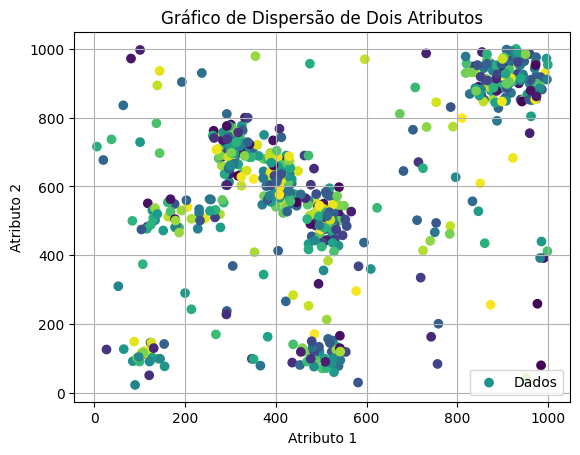

In [54]:
plt.scatter(a1_data["a"], a1_data["f"], c=df['Cores'], label='Dados')
plt.title('Gráfico de Dispersão de Dois Atributos')
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.legend()
plt.grid(True)
plt.show()